In [2]:
import pandas as pd

In [3]:
df_log_HT = pd.read_csv("/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET.csv" ,low_memory=False)

In [4]:
df_log_apr = pd.read_csv("/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_Logsheet_April 2025.csv" ,low_memory=False)

In [5]:
import pandas as pd

# --- CONFIGURATION: PLEASE EDIT THIS SECTION ---

# File 1 Details
file1_path = "/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET.csv"
file1_column_name = "SWITCH_NO"  

# File 2 Details
file2_path = "/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_Logsheet_April 2025.csv"
file2_column_name = "SWITCH_NO" 


def find_actual_column_name(columns, target_name):
    """Helper function to find a column name, ignoring case."""
    for col in columns:
        if str(col).lower() == str(target_name).lower():
            return col
    return None

def get_unique_values_from_file(filepath, column_name):
    """
    Reads a file, extracts unique values from a specific column,
    cleans them, and returns them as a set.
    """
    print(f"Processing file: {filepath}...")
    try:
        # Read just the header to find the correct column name (case-insensitive)
        header_df = pd.read_csv(filepath, nrows=0, on_bad_lines='skip')
        actual_col_name = find_actual_column_name(header_df.columns, column_name)

        if not actual_col_name:
            print(f"  - Error: Column '{column_name}' not found. Please check the column name.")
            return set()

        # Read the full column using the correct name
        df = pd.read_csv(filepath, usecols=[actual_col_name], on_bad_lines='skip')
        
        # --- Data Cleaning ---
        # Convert all values to string, extract digits, and then convert to numbers.
        # This handles mixed data types (e.g., '123' vs 123) and text prefixes (e.g., 'SW-123').
        s = pd.Series(df[actual_col_name].dropna().unique(), dtype=str)
        s = s.str.extract('(\d+)').iloc[:, 0]
        s = pd.to_numeric(s, errors='coerce')
        
        cleaned_values = set(s.dropna().astype(int))
        
        print(f"  - Found {len(cleaned_values)} unique, clean values.")
        return cleaned_values

    except FileNotFoundError:
        print(f"  - Error: File not found. Please check the path: {filepath}")
        return set()
    except Exception as e:
        print(f"  - An unexpected error occurred: {e}")
        return set()

# --- Main Script ---

# Get the unique values from both files
unique_values_from_file1 = get_unique_values_from_file(file1_path, file1_column_name)
unique_values_from_file2 = get_unique_values_from_file(file2_path, file2_column_name)

# --- Comparison and Reporting ---

print("\n--- Comparison Report ---")
if not unique_values_from_file1 or not unique_values_from_file2:
    print("Could not perform comparison because one of the files could not be processed or contained no valid data.")
else:
    # Use set intersection to find the values that exist in both sets
    matching_values = unique_values_from_file1.intersection(unique_values_from_file2)
    
    # Print the final report
    print(f"Unique values in '{file1_path}' (Column: {file1_column_name}): {len(unique_values_from_file1)}")
    print(f"Unique values in '{file2_path}' (Column: {file2_column_name}): {len(unique_values_from_file2)}")
    print("-" * 25)
    print(f"Number of values that matched: {len(matching_values)}")
    print("-" * 25)


Processing file: /media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET.csv...
  - Found 5145 unique, clean values.
Processing file: /media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_Logsheet_April 2025.csv...
  - Found 199 unique, clean values.

--- Comparison Report ---
Unique values in '/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET.csv' (Column: SWITCH_NO): 5145
Unique values in '/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_Logsheet_April 2025.csv' (Column: SWITCH_NO): 199
-------------------------
Number of values that matched: 177
-------------------------


In [6]:
import pandas as pd

# --- CONFIGURATION: PLEASE EDIT THIS SECTION ---

# File 1 Details
file1_path = "/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET.csv"
file1_column_name = "SWITCH_NO"  

# File 2 Details
file2_path = "/media/sagarkumar/New Volume/SAGAR/IPYNB_FILE/CSV FILE/EXETRA FILES/feeder_ids_list_11kv.csv"
file2_column_name = "FEEDER"


def find_actual_column_name(columns, target_name):
    """Helper function to find a column name, ignoring case."""
    for col in columns:
        if str(col).lower() == str(target_name).lower():
            return col
    return None

def get_unique_values_from_file(filepath, column_name):
    """
    Reads a file, extracts unique values from a specific column,
    cleans them, and returns them as a set.
    """
    print(f"Processing file: {filepath}...")
    try:
        # Read just the header to find the correct column name (case-insensitive)
        header_df = pd.read_csv(filepath, nrows=0, on_bad_lines='skip')
        actual_col_name = find_actual_column_name(header_df.columns, column_name)

        if not actual_col_name:
            print(f"  - Error: Column '{column_name}' not found. Please check the column name.")
            return set()

        # Read the full column using the correct name
        df = pd.read_csv(filepath, usecols=[actual_col_name], on_bad_lines='skip')
        
        # --- Data Cleaning ---
        # Convert all values to string, extract digits, and then convert to numbers.
        # This handles mixed data types (e.g., '123' vs 123) and text prefixes (e.g., 'SW-123').
        s = pd.Series(df[actual_col_name].dropna().unique(), dtype=str)
        s = s.str.extract('(\d+)').iloc[:, 0]
        s = pd.to_numeric(s, errors='coerce')
        
        cleaned_values = set(s.dropna().astype(int))
        
        print(f"  - Found {len(cleaned_values)} unique, clean values.")
        return cleaned_values

    except FileNotFoundError:
        print(f"  - Error: File not found. Please check the path: {filepath}")
        return set()
    except Exception as e:
        print(f"  - An unexpected error occurred: {e}")
        return set()

# --- Main Script ---

# Get the unique values from both files
unique_values_from_file1 = get_unique_values_from_file(file1_path, file1_column_name)
unique_values_from_file2 = get_unique_values_from_file(file2_path, file2_column_name)

# --- Comparison and Reporting ---

print("\n--- Comparison Report ---")
if not unique_values_from_file1 or not unique_values_from_file2:
    print("Could not perform comparison because one of the files could not be processed or contained no valid data.")
else:
    # Use set intersection to find the values that exist in both sets
    matching_values = unique_values_from_file1.intersection(unique_values_from_file2)
    
    # Print the final report
    print(f"Unique values in '{file1_path}' (Column: {file1_column_name}): {len(unique_values_from_file1)}")
    print(f"Unique values in '{file2_path}' (Column: {file2_column_name}): {len(unique_values_from_file2)}")
    print("-" * 25)
    print(f"Number of values that matched: {len(matching_values)}")
    print("-" * 25)


Processing file: /media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET.csv...
  - Found 5145 unique, clean values.
Processing file: /media/sagarkumar/New Volume/SAGAR/IPYNB_FILE/CSV FILE/EXETRA FILES/feeder_ids_list_11kv.csv...
  - Found 1191 unique, clean values.

--- Comparison Report ---
Unique values in '/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET.csv' (Column: SWITCH_NO): 5145
Unique values in '/media/sagarkumar/New Volume/SAGAR/IPYNB_FILE/CSV FILE/EXETRA FILES/feeder_ids_list_11kv.csv' (Column: FEEDER): 1191
-------------------------
Number of values that matched: 978
-------------------------


In [7]:
import pandas as pd

# --- CONFIGURATION: PLEASE EDIT THIS SECTION ---

# File 1 Details
file1_path = "/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET.csv"
file1_column_name = "FREE_REMARKS" 

# File 2 Details
file2_path = "/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_Logsheet_April 2025.csv"
file2_column_name = "FREE_REMARKS" 


def find_actual_column_name(columns, target_name):
    """Helper function to find a column name, ignoring case."""
    for col in columns:
        if str(col).lower() == str(target_name).lower():
            return col
    return None

def get_unique_values_from_file(filepath, column_name):
    """
    Reads a file, extracts unique values from a specific column,
    cleans them, and returns them as a set.
    """
    print(f"Processing file: {filepath}...")
    try:
        # Read just the header to find the correct column name (case-insensitive)
        header_df = pd.read_csv(filepath, nrows=0, on_bad_lines='skip')
        actual_col_name = find_actual_column_name(header_df.columns, column_name)

        if not actual_col_name:
            print(f"  - Error: Column '{column_name}' not found. Please check the column name.")
            return set()

        # Read the full column using the correct name
        df = pd.read_csv(filepath, usecols=[actual_col_name], on_bad_lines='skip')
        
        # --- Data Cleaning ---
        # Convert all values to string, extract digits, and then convert to numbers.
        # This handles mixed data types (e.g., '123' vs 123) and text prefixes (e.g., 'SW-123').
        s = pd.Series(df[actual_col_name].dropna().unique(), dtype=str)
        s = s.str.extract('(\d+)').iloc[:, 0]
        s = pd.to_numeric(s, errors='coerce')
        
        cleaned_values = set(s.dropna().astype(int))
        
        print(f"  - Found {len(cleaned_values)} unique, clean values.")
        return cleaned_values

    except FileNotFoundError:
        print(f"  - Error: File not found. Please check the path: {filepath}")
        return set()
    except Exception as e:
        print(f"  - An unexpected error occurred: {e}")
        return set()

# --- Main Script ---

# Get the unique values from both files
unique_values_from_file1 = get_unique_values_from_file(file1_path, file1_column_name)
unique_values_from_file2 = get_unique_values_from_file(file2_path, file2_column_name)

# --- Comparison and Reporting ---

print("\n--- Comparison Report ---")
if not unique_values_from_file1 or not unique_values_from_file2:
    print("Could not perform comparison because one of the files could not be processed or contained no valid data.")
else:
    # Use set intersection to find the values that exist in both sets
    matching_values = unique_values_from_file1.intersection(unique_values_from_file2)
    
    # Print the final report
    print(f"Unique values in '{file1_path}' (Column: {file1_column_name}): {len(unique_values_from_file1)}")
    print(f"Unique values in '{file2_path}' (Column: {file2_column_name}): {len(unique_values_from_file2)}")
    print("-" * 25)
    print(f"Number of values that matched: {len(matching_values)}")
    print("-" * 25)


Processing file: /media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET.csv...
  - Found 1098 unique, clean values.
Processing file: /media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_Logsheet_April 2025.csv...
  - Found 41 unique, clean values.

--- Comparison Report ---
Unique values in '/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET.csv' (Column: FREE_REMARKS): 1098
Unique values in '/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_Logsheet_April 2025.csv' (Column: FREE_REMARKS): 41
-------------------------
Number of values that matched: 26
-------------------------


In [8]:
col = df_log_HT[df_log_HT["ENTRY_TYPE"]==1]

In [9]:
len(col)

11073

In [10]:
col1 = df_log_HT['ENTRY_TYPE'].unique()

In [11]:
col['ENTRY_TYPE'].unique()  

array([1])

 Visualizing Missing Values :


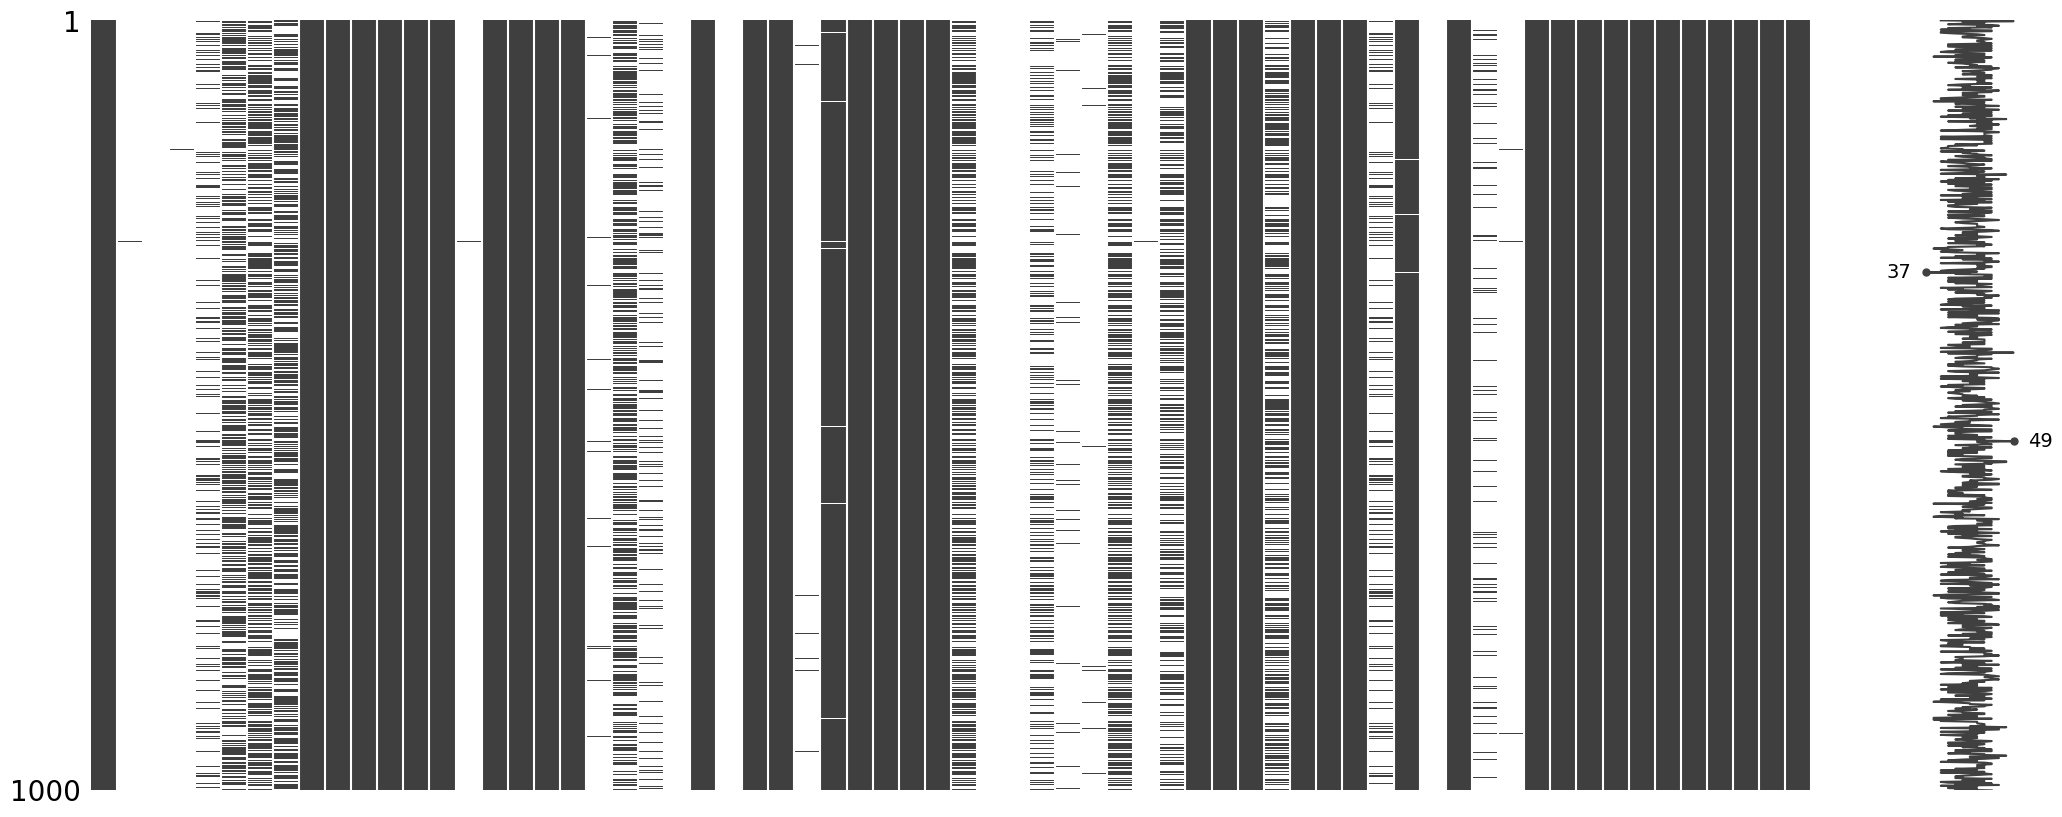

In [13]:
import missingno as msno
import matplotlib.pyplot as plt

print(" Visualizing Missing Values :")
msno.matrix(df_log_HT.sample(min(len(df_log_HT), 1000)))
plt.show()



In [20]:
import pandas as pd

# --- CONFIGURATION: PLEASE EDIT THIS SECTION ---

# File 1 Details
file1_path = "/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET.csv"
file1_column_name = "MAIN_REPORTED_TIME" 

# File 2 Details
file2_path = "/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET.csv"
file2_column_name = "FIRAT_TIME" 


def find_actual_column_name(columns, target_name):
    """Helper function to find a column name, ignoring case."""
    for col in columns:
        if str(col).lower() == str(target_name).lower():
            return col
    return None

def get_unique_values_from_file(filepath, column_name):
    """
    Reads a file, extracts unique values from a specific column,
    cleans them, and returns them as a set.
    """
    print(f"Processing file: {filepath}...")
    try:
        # Read just the header to find the correct column name (case-insensitive)
        header_df = pd.read_csv(filepath, nrows=0, on_bad_lines='skip')
        actual_col_name = find_actual_column_name(header_df.columns, column_name)

        if not actual_col_name:
            print(f"  - Error: Column '{column_name}' not found. Please check the column name.")
            return set()

        # Read the full column using the correct name
        df = pd.read_csv(filepath, usecols=[actual_col_name], on_bad_lines='skip')
        
        # --- Data Cleaning ---
        # Convert all values to string, extract digits, and then convert to numbers.
        # This handles mixed data types (e.g., '123' vs 123) and text prefixes (e.g., 'SW-123').
        s = pd.Series(df[actual_col_name].dropna().unique(), dtype=str)
        s = s.str.extract('(\d+)').iloc[:, 0]
        s = pd.to_numeric(s, errors='coerce')
        
        cleaned_values = set(s.dropna().astype(int))
        
        print(f"  - Found {len(cleaned_values)} unique, clean values.")
        return cleaned_values

    except FileNotFoundError:
        print(f"  - Error: File not found. Please check the path: {filepath}")
        return set()
    except Exception as e:
        print(f"  - An unexpected error occurred: {e}")
        return set()

# --- Main Script ---

# Get the unique values from both files
unique_values_from_file1 = get_unique_values_from_file(file1_path, file1_column_name)
unique_values_from_file2 = get_unique_values_from_file(file2_path, file2_column_name)

# --- Comparison and Reporting ---

print("\n--- Comparison Report ---")
if not unique_values_from_file1 or not unique_values_from_file2:
    print("Could not perform comparison because one of the files could not be processed or contained no valid data.")
else:
    # Use set intersection to find the values that exist in both sets
    matching_values = unique_values_from_file1.intersection(unique_values_from_file2)
    
    # Print the final report
    print(f"Unique values in '{file1_path}' (Column: {file1_column_name}): {len(unique_values_from_file1)}")
    print(f"Unique values in '{file2_path}' (Column: {file2_column_name}): {len(unique_values_from_file2)}")
    print("-" * 25)
    print(f"Number of values that matched: {len(matching_values)}")
    print("-" * 25)


Processing file: /media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET.csv...
  - Found 10 unique, clean values.
Processing file: /media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET.csv...
  - Found 10 unique, clean values.

--- Comparison Report ---
Unique values in '/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET.csv' (Column: MAIN_REPORTED_TIME): 10
Unique values in '/media/sagarkumar/New Volume/SAGAR/2-year-data/TXN_NMS_HTLOGSHEET.csv' (Column: FIRAT_TIME): 10
-------------------------
Number of values that matched: 10
-------------------------


In [24]:
# Read the relevant columns from the file
df = pd.read_csv(file1_path, usecols=[file1_column_name, file2_column_name], low_memory=False)

# Get unique values from each column
unique_file1 = set(df[file1_column_name].dropna().unique())
unique_file2 = set(df[file2_column_name].dropna().unique())

# Find the intersection (matching unique values)
matching_unique_values = unique_file1.intersection(unique_file2)

# Print the length of matching unique values
print("Number of matching unique values:", len(matching_unique_values))

Number of matching unique values: 21444


In [21]:
col = df_log_HT['FIRAT_TIME'].unique()